**NAME: Bhoomika Agrawal**
**SAP ID: 60009220040**


# **Book Recommendation Datasets:**
https://drive.google.com/drive/folders/1ZYrXsqE7bOi7D_toAGLQInyCTuyUsVNB?usp=sharing

# **Data Loading and Cleaning**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## **Load datasets**

In [3]:
books = pd.read_csv('/content/drive/MyDrive/mini project/Books.csv')
ratings = pd.read_csv('/content/drive/MyDrive/mini project/Ratings.csv')
users = pd.read_csv('/content/drive/MyDrive/mini project/Users.csv')

In [4]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [5]:
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [6]:
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [7]:
print("Books Shape: " , books.shape)
print("Ratings Shape: " , ratings.shape)
print("Users Shape: " , users.shape)

Books Shape:  (271360, 8)
Ratings Shape:  (1149780, 3)
Users Shape:  (278858, 3)


## **Check for null values and duplicates**

In [8]:
print("Any null values in Books:\n" , books.isnull().sum())
print("Any null values in Ratings:\n ", ratings.isnull().sum())
print("Any null values in Users:\n", users.isnull().sum())

Any null values in Books:
 ISBN                   0
Book-Title             0
Book-Author            2
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64
Any null values in Ratings:
  User-ID        0
ISBN           0
Book-Rating    0
dtype: int64
Any null values in Users:
 User-ID          0
Location         0
Age         110762
dtype: int64


In [9]:
print(books.duplicated().sum())
print(users.duplicated().sum())
print(ratings.duplicated().sum())

0
0
0


## **Data type of each dataset**

In [10]:
def print_dtype_of_df(df, ds_name = 'df'):
    print(f"Data type of each column in the {ds_name} dataset:")
    dash_sep(75)
    print(df.dtypes)

def dash_sep(num=50):
    print("_"*num)

print_dtype_of_df(books, 'Books')

print_dtype_of_df(ratings, 'Ratings')

print_dtype_of_df(users, 'Users')

Data type of each column in the Books dataset:
___________________________________________________________________________
ISBN                   object
Book-Title             object
Book-Author            object
Year-Of-Publication    object
Publisher              object
Image-URL-S            object
Image-URL-M            object
Image-URL-L            object
dtype: object
Data type of each column in the Ratings dataset:
___________________________________________________________________________
User-ID         int64
ISBN           object
Book-Rating     int64
dtype: object
Data type of each column in the Users dataset:
___________________________________________________________________________
User-ID       int64
Location     object
Age         float64
dtype: object


The `year of publication` column there is an error in which the column contain string value 'DK Publishing Inc' and thats a data entry error, a year column all its value should be integers.

## **Clean `Year-Of-Publication` column**


In [11]:
books[(books['Year-Of-Publication'] == 'DK Publishing Inc') | (books['Year-Of-Publication'] == 'Gallimard')]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
209538,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,NaN
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-M...",2003,Gallimard,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,NaN
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Book...",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,NaN


here we can see in this 3 rows the value of the year is value in the Book author, and the value of Year of Publication should be in the publisher, so from this pattern we can conclude that the values needs to be shifted

In [12]:
temp = books[(books['Year-Of-Publication'] == 'DK Publishing Inc') | (books['Year-Of-Publication'] == 'Gallimard')]

In [13]:
temp[temp['Book-Author'] == temp['Book-Author'][209538]]['Book-Title'].values[0]

'DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)\\";Michael Teitelbaum"'

In [14]:
temp[temp['Book-Author'] == temp['Book-Author'][209538]]['Book-Title'].values[1]

'DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)\\";James Buckley"'

As we can see here in the previous outputs that the name of the authors are concatenated with the Book title so we need to seperate them

In [15]:
# Separate authors and book titles
authors = []
books_titles = []

for title in temp['Book-Title']:
    # Split the title to separate author and book title
    author = title.split(';')[-1].split('"')[0]  # Extract author
    book = title.split(';')[0].split('\\')[0]    # Extract book title
    authors.append(author)
    books_titles.append(book)

In [16]:
# Shift values and assign new ones
cols_to_shift = books.columns[1:]  # Exclude 'ISBN' column
temp = pd.concat([temp['ISBN'].to_frame(), temp[cols_to_shift].shift(periods=1, axis=1)], axis=1)
temp['Book-Title'] = books_titles
temp['Book-Author'] = authors

In [17]:
temp

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
209538,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",Michael Teitelbaum,2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers",Jean-Marie Gustave Le ClÃ?Â©zio,2003,Gallimard,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Book...",James Buckley,2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...


In [18]:
# Get the index of rows to remove
rows_to_rem = list(temp.index)
# Remove the dirty rows from the 'books' DataFrame
books.drop(rows_to_rem, axis=0, inplace=True)

# Add the cleaned rows back to the 'books' DataFrame
for ind in rows_to_rem:
    books.loc[ind] = list(temp.loc[ind].values)

# Convert 'Year-Of-Publication' to integers
books['Year-Of-Publication'] = books['Year-Of-Publication'].astype('int32')

In [19]:
books.dtypes

ISBN                   object
Book-Title             object
Book-Author            object
Year-Of-Publication     int32
Publisher              object
Image-URL-S            object
Image-URL-M            object
Image-URL-L            object
dtype: object

### **Summary**
* Loaded the datasets for books, ratings, and users.
* Checked for null values and duplicates in the datasets.
* Identified and corrected errors in the 'Year-Of-Publication' column where some values were mistakenly set as publisher names.

# **Exploratory Data Analysis (EDA)**

In [20]:
def plot_top20(df, column, title, x_label, y_label, top=20):
    pl = df[column].value_counts().head(top)
    plt.figure(figsize=(12, 8))
    plt.bar(pl.index, pl.values, color='navy')
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

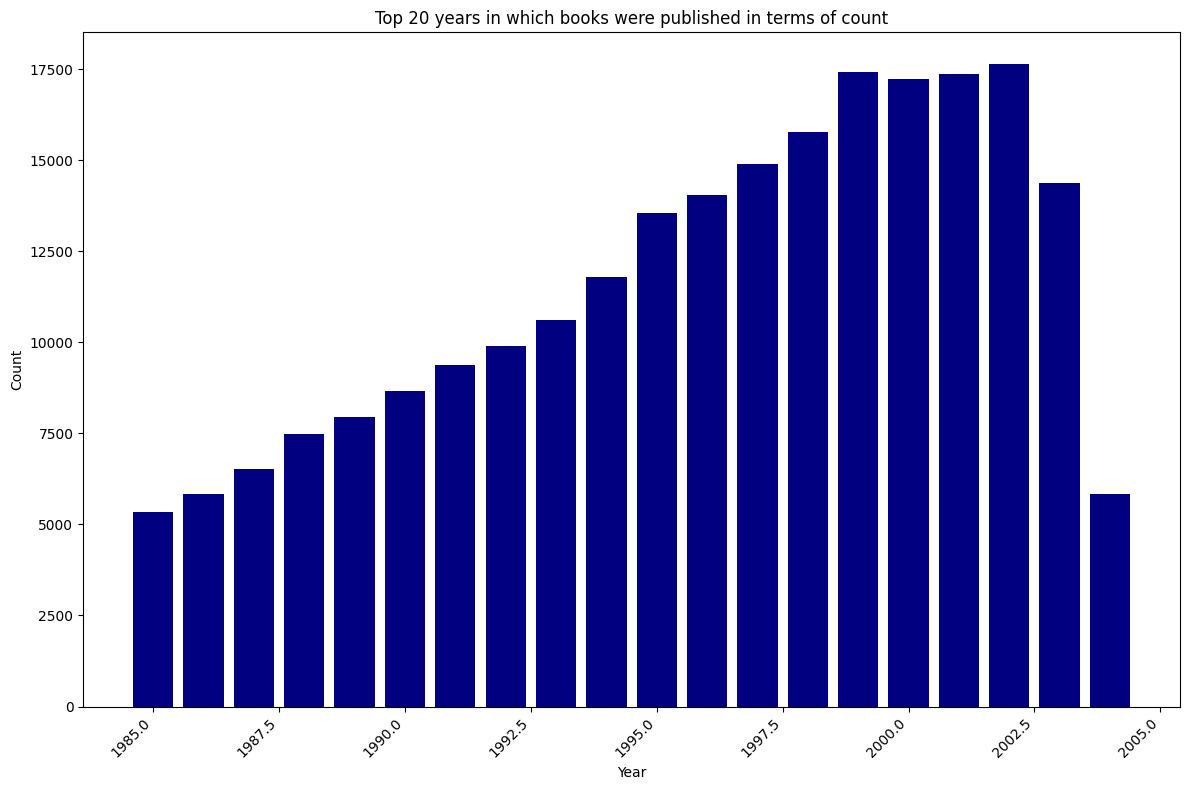

In [21]:
plot_top20(books, 'Year-Of-Publication', 'Top 20 years in which books were published in terms of count', "Year", "Count")

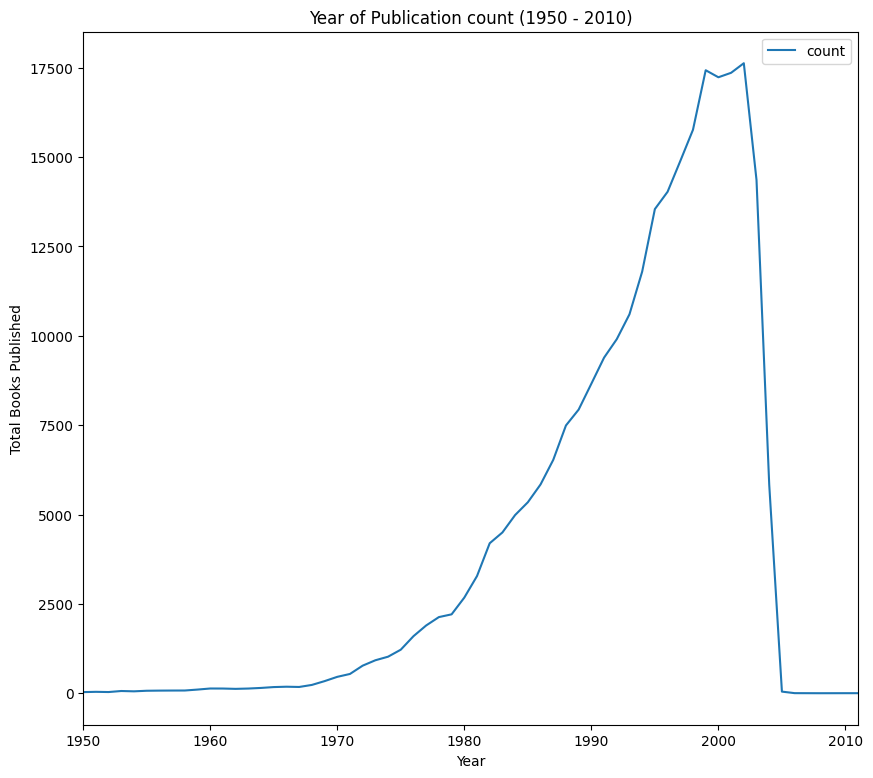

In [22]:
year_count=books['Year-Of-Publication'].value_counts()
year_count=pd.DataFrame(year_count)

plt.figure(figsize=(10, 9))
sns.lineplot(data=year_count)
plt.title('Year of Publication count (1950 - 2010)')
plt.xlim(1950, 2011)
plt.xlabel('Year')
plt.ylabel('Total Books Published')
plt.show()

The years 99 to 02 are the years in which most books were published

## **Analysis of Top Authors and Publishers**

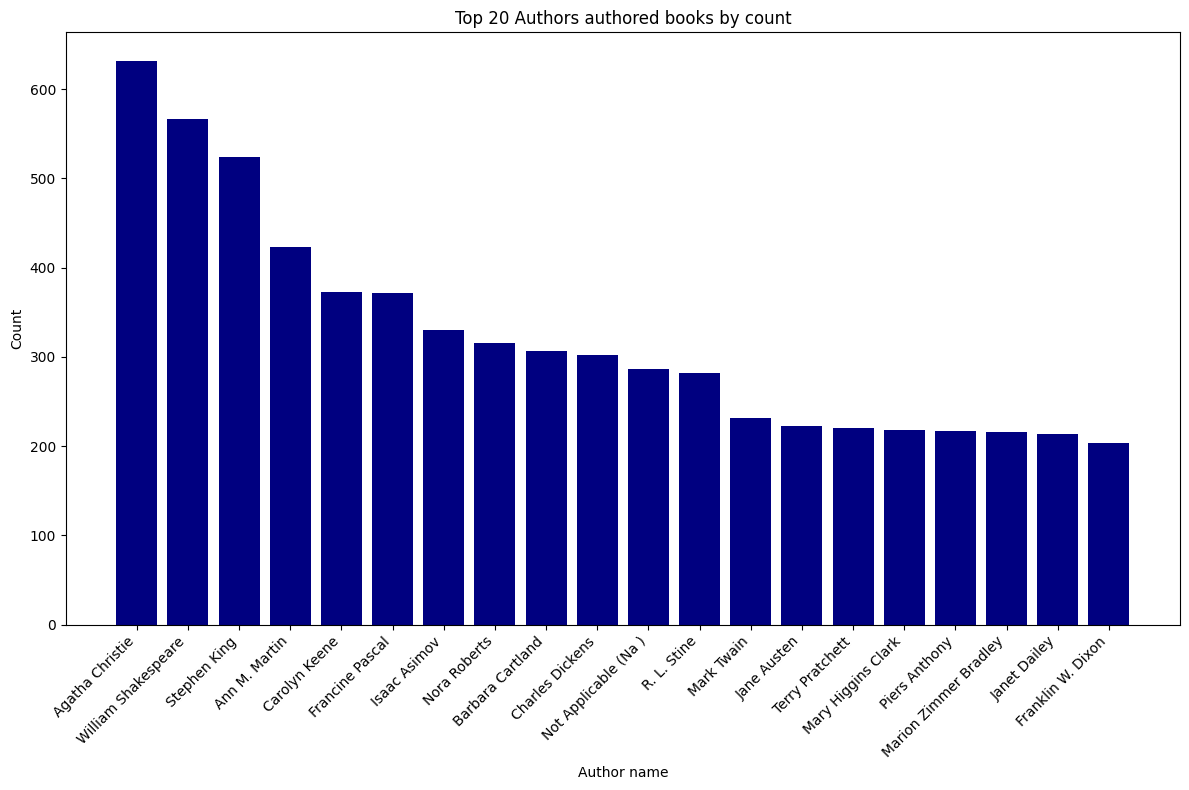

In [23]:
plot_top20(books, 'Book-Author', "Top 20 Authors authored books by count", "Author name", "Count")

Agatha Christie is the top author with 632 books in the dataset

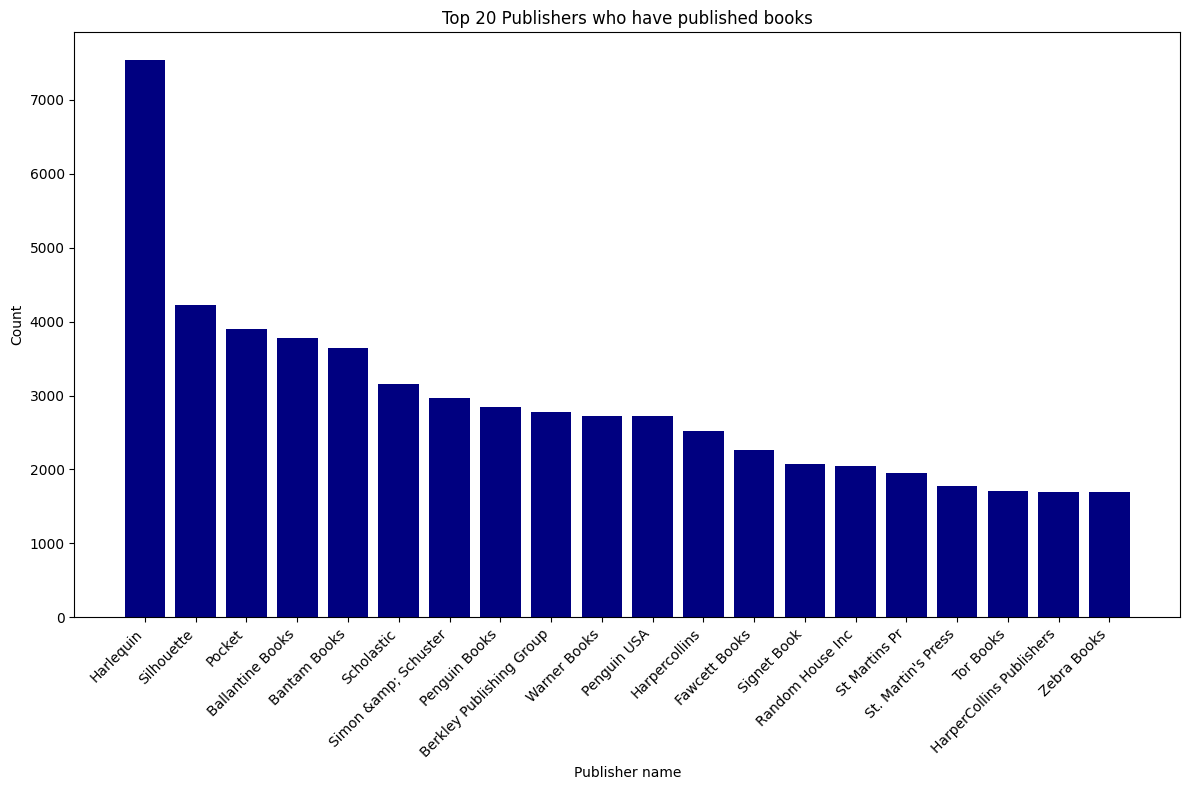

In [24]:
plot_top20(books, 'Publisher', "Top 20 Publishers who have published books", "Publisher name", "Count")

Harlequin is the top publisher

## **Merge books df with ratings**

In [25]:
books_with_ratings = pd.merge(books, ratings, on='ISBN')

In [26]:
books_with_ratings.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,User-ID,Book-Rating
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,2,0
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,8,5
2,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,11400,0
3,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,11676,8
4,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,41385,0


## **Average rating of the books of the top 20 authors**



In [27]:
import pandas as pd

# Get the top 20 authors
authors_top20 = books['Book-Author'].value_counts().head(20)
authors_top20 = list(authors_top20.index)

# Drop null values
books_with_ratings.dropna(inplace=True)

# Filter out books with a rating of 0
books_with_ratings = books_with_ratings[books_with_ratings['Book-Rating'] != 0]

# Filter out books by authors not in the top 20
top20_authors = books_with_ratings[books_with_ratings['Book-Author'].isin(authors_top20)]

# Calculate the mean rating for each author
top20_author_mean_rating = top20_authors.groupby('Book-Author')['Book-Rating'].mean().reset_index().sort_values(by='Book-Rating', ascending=False)

top20_author_mean_rating

,Book-Author,Book-Rating
19,William Shakespeare,8.303357
11,Mark Twain,8.284507
8,Jane Austen,8.187595
18,Terry Pratchett,8.151177
14,Not Applicable (Na ),8.094340
7,Isaac Asimov,7.915167
3,Carolyn Keene,7.823529
17,Stephen King,7.815046
0,Agatha Christie,7.792102
4,Charles Dickens,7.762836


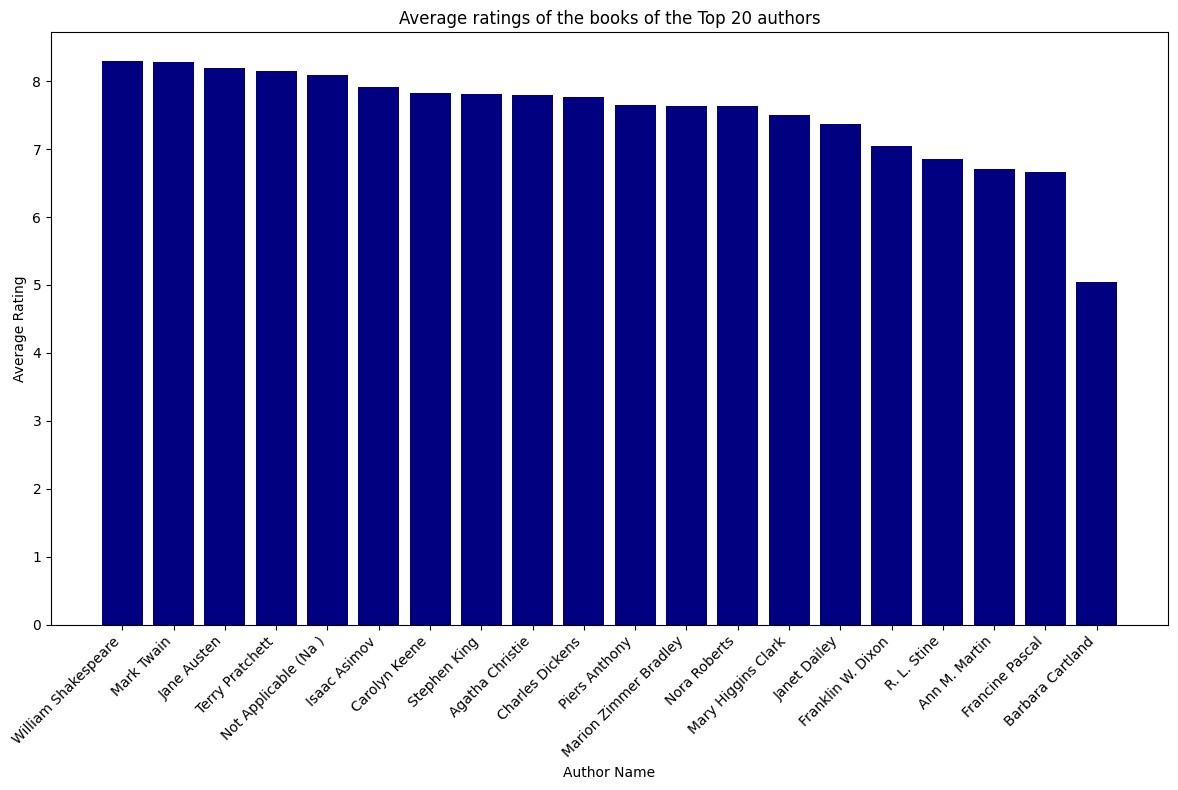

In [28]:
plt.figure(figsize=(12, 8))
plt.bar(top20_author_mean_rating['Book-Author'], top20_author_mean_rating['Book-Rating'], color='navy')
plt.xlabel("Author Name")
plt.ylabel("Average Rating")
plt.title("Average ratings of the books of the Top 20 authors")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

William Shakespeare is the top rated author

## **Average rating of the books by top 20 publishers**

In [29]:
# Get the top 20 publishers
publishers_top20 = books['Publisher'].value_counts().head(20)
publishers_top20 = list(publishers_top20.index)

# Drop null values
books_with_ratings.dropna(inplace=True)

# Filter out books with a rating of 0
books_with_ratings = books_with_ratings[books_with_ratings['Book-Rating'] != 0]

# Filter out books by publishers not in the top 20
top20_publishers = books_with_ratings[books_with_ratings['Publisher'].isin(publishers_top20)]

# Calculate the mean rating for each publisher
top20_publishers_mean_rating = top20_publishers.groupby('Publisher')['Book-Rating'].mean().reset_index().sort_values(by='Book-Rating', ascending=False)

top20_publishers_mean_rating

,Publisher,Book-Rating
11,Scholastic,7.818161
7,Penguin Books,7.773789
17,Tor Books,7.686075
0,Ballantine Books,7.610437
16,St. Martin's Press,7.596059
12,Signet Book,7.591292
5,HarperCollins Publishers,7.584115
9,Pocket,7.564115
18,Warner Books,7.543623
14,Simon &amp; Schuster,7.522894


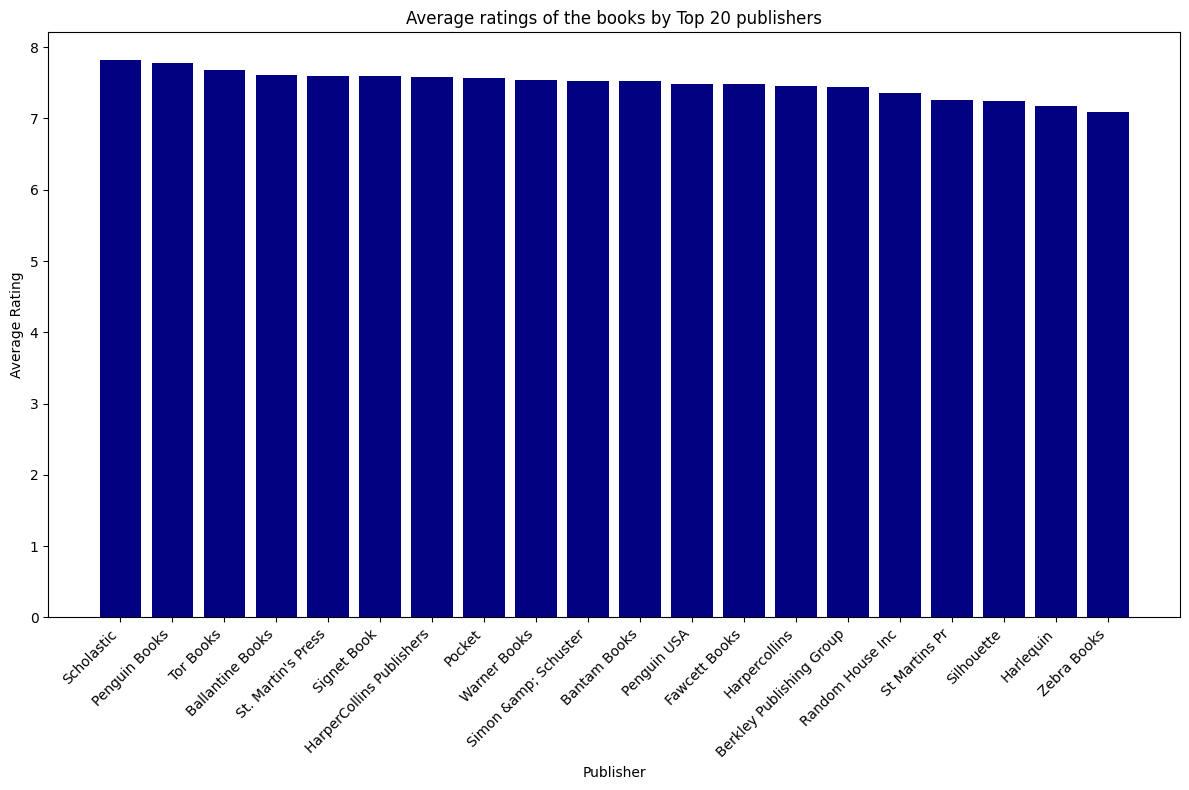

In [30]:
plt.figure(figsize=(12, 8))
plt.bar(top20_publishers_mean_rating['Publisher'], top20_publishers_mean_rating['Book-Rating'], color='navy')
plt.xlabel("Publisher")
plt.ylabel("Average Rating")
plt.title("Average ratings of the books by Top 20 publishers")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

The average rating of the books of the publishers are close to each other

## **Most rated books by users**

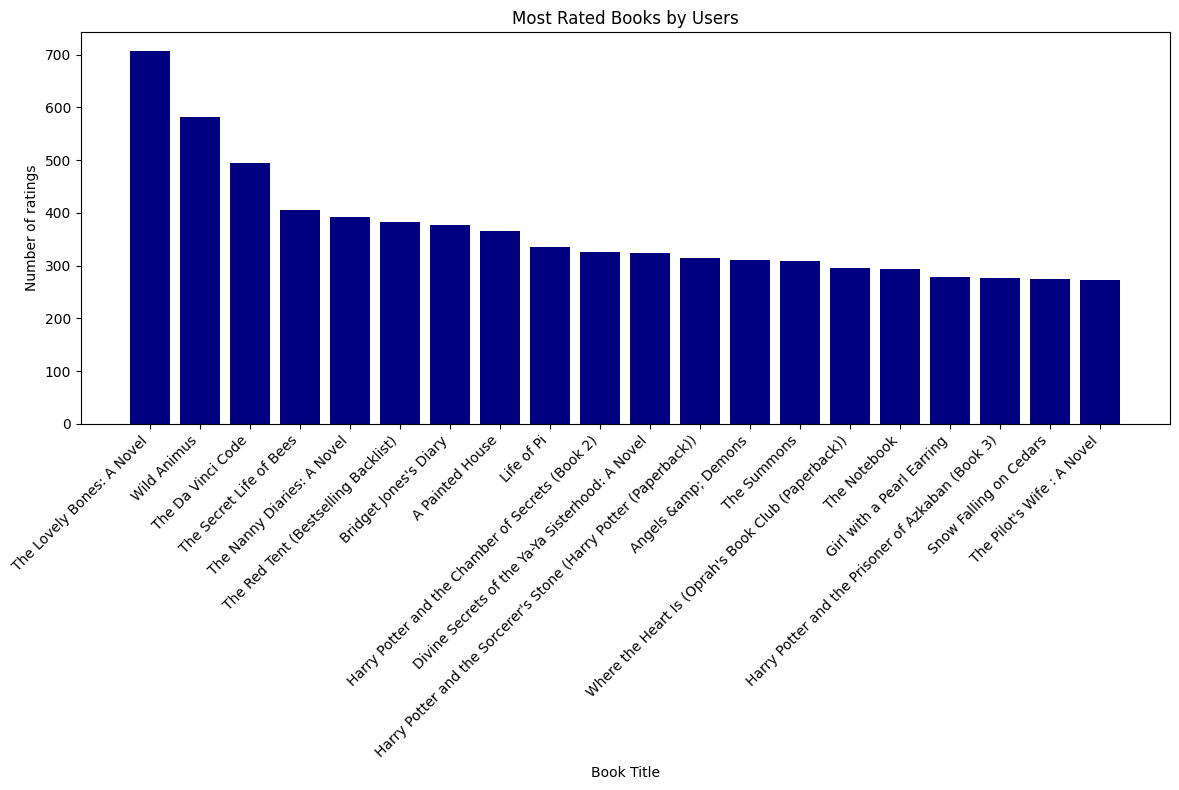

In [31]:
df = pd.merge(books_with_ratings, users, on='User-ID')
df = books_with_ratings[books_with_ratings['Book-Rating'] != 0]
plot_top20(df, 'Book-Title', "Most Rated Books by Users", "Book Title", "Number of ratings")

## **Top rated books**

In [32]:
# Get the top 20 books
books_top20 = df['Book-Title'].value_counts().head(20)
books_top20 = list(books_top20.index)

# Drop null values
books_with_ratings.dropna(inplace=True)

# Filter out books with a rating of 0
books_with_ratings = books_with_ratings[books_with_ratings['Book-Rating'] != 0]

# Filter out books by title not in the top 20
top20_books = books_with_ratings[books_with_ratings['Book-Title'].isin(books_top20)]

# Calculate the mean rating for each book
top20_books_mean_rating = top20_books.groupby('Book-Title')['Book-Rating'].mean().reset_index().sort_values(by='Book-Rating', ascending=False)

# Get the top 10 rated books
top10_books = top20_books_mean_rating.head(10)
top10_books

,Book-Title,Book-Rating
6,Harry Potter and the Prisoner of Azkaban (Book 3),9.043321
7,Harry Potter and the Sorcerer's Stone (Harry P...,8.936508
5,Harry Potter and the Chamber of Secrets (Book 2),8.840491
16,The Secret Life of Bees,8.477833
10,The Da Vinci Code,8.439271
11,The Lovely Bones: A Novel,8.185290
15,The Red Tent (Bestselling Backlist),8.182768
18,Where the Heart Is (Oprah's Book Club (Paperba...,8.142373
8,Life of Pi,8.080357
1,Angels &amp; Demons,8.016129


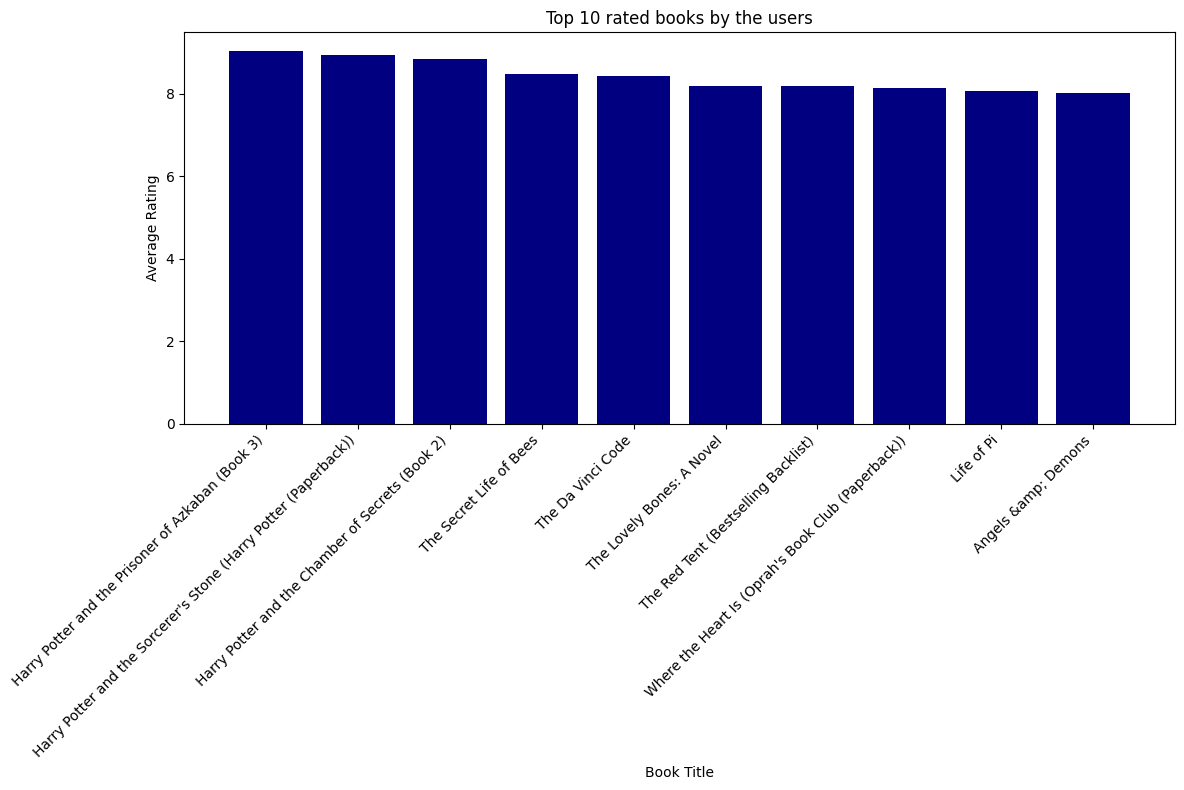

In [33]:
plt.figure(figsize=(12, 8))
plt.bar(top10_books['Book-Title'], top10_books['Book-Rating'], color='navy')
plt.xlabel("Book Title")
plt.ylabel("Average Rating")
plt.title("Top 10 rated books by the users")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Harry Potter are the most rated books


### **Summary**
- Explored the distribution of books published over the years, revealing a peak in publications from 1999 to 2002.
- Identified Agatha Christie as the top author with 632 books in the dataset.
- Discovered that the average rating of books by the top 20 authors varied, with William Shakespeare being the top-rated author.
- Found that the average rating of books by the top 20 publishers was consistent, indicating similar quality across publishers.
- Identified "Harry Potter" as the most rated series by users.